## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     82
3  2008-08-01 00:00:00        c#    503
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2686  2024-09-01 00:00:00     php    712
2687  2024-09-01 00:00:00  python   4196
2688  2024-09-01 00:00:00       r    806
2689  2024-09-01 00:00:00    ruby     86
2690  2024-09-01 00:00:00   swift    586


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
print(f"Columns: {df.columns}")
print(f"dimensions: {df.shape}")

Columns: Index(['DATE', 'TAG', 'POSTS'], dtype='object')
dimensions: (2691, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     2691
TAG      2691
POSTS    2691
dtype: int64

In [7]:
if df.notna().all().all():
    print(True)
else:
    print(False)


True


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [8]:
group_tag = df.groupby('TAG')['POSTS'].sum()
print(group_tag)
print(f'Programming language with the highest post:{group_tag.idxmax()}: {group_tag[group_tag.idxmax()]}')

TAG
assembly        44762
c              406220
c#            1621691
c++            811109
delphi          52186
go              73826
java          1918808
javascript    2532546
perl            68226
php           1467328
python        2207230
r              509086
ruby           229248
swift          335288
Name: POSTS, dtype: int64
Programming language with the highest post:javascript: 2532546


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [9]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,194,194
c,194,194
c#,195,195
c++,194,194
delphi,194,194
go,179,179
java,194,194
javascript,194,194
perl,194,194


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [10]:
type(df.DATE[1])

str

In [11]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [29]:
df.DATE = pd.to_datetime(df.DATE)
print(type(df.DATE))
df.head()

<class 'pandas.core.series.Series'>


,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [13]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
# reshaped_df = reshaped_df.fillna(value=0)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,221.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1124.0,633.0,130.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,721.0,128.0,604.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


In [14]:
reshaped_df.isna().values.any()

np.True_

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [15]:
reshaped_df.shape

(195, 14)

In [16]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [17]:
reshaped_df.count()

TAG
assembly      194
c             194
c#            195
c++           194
delphi        194
go            179
java          194
javascript    194
perl          194
php           194
python        194
r             192
ruby          194
swift         185
dtype: int64

In [18]:
reshaped_df = reshaped_df.fillna(value=0)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,221.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1124.0,633.0,130.0,474.0,535.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1985.0,805.0,112.0,0.0,1146.0,721.0,128.0,604.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,954.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [19]:
reshaped_df.count()

TAG
assembly      195
c             195
c#            195
c++           195
delphi        195
go            195
java          195
javascript    195
perl          195
php           195
python        195
r             195
ruby          195
swift         195
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [20]:
import matplotlib.pyplot as plt

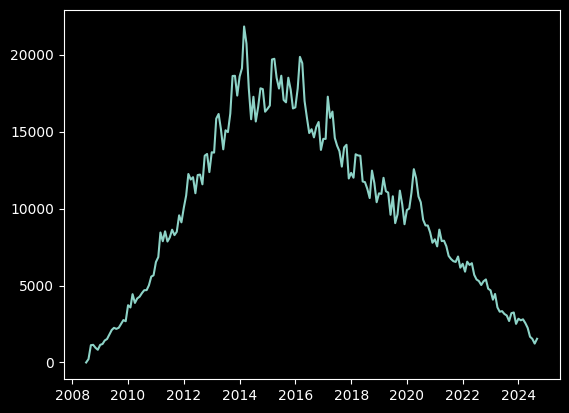

In [21]:
plt.plot(reshaped_df.index, reshaped_df.java)

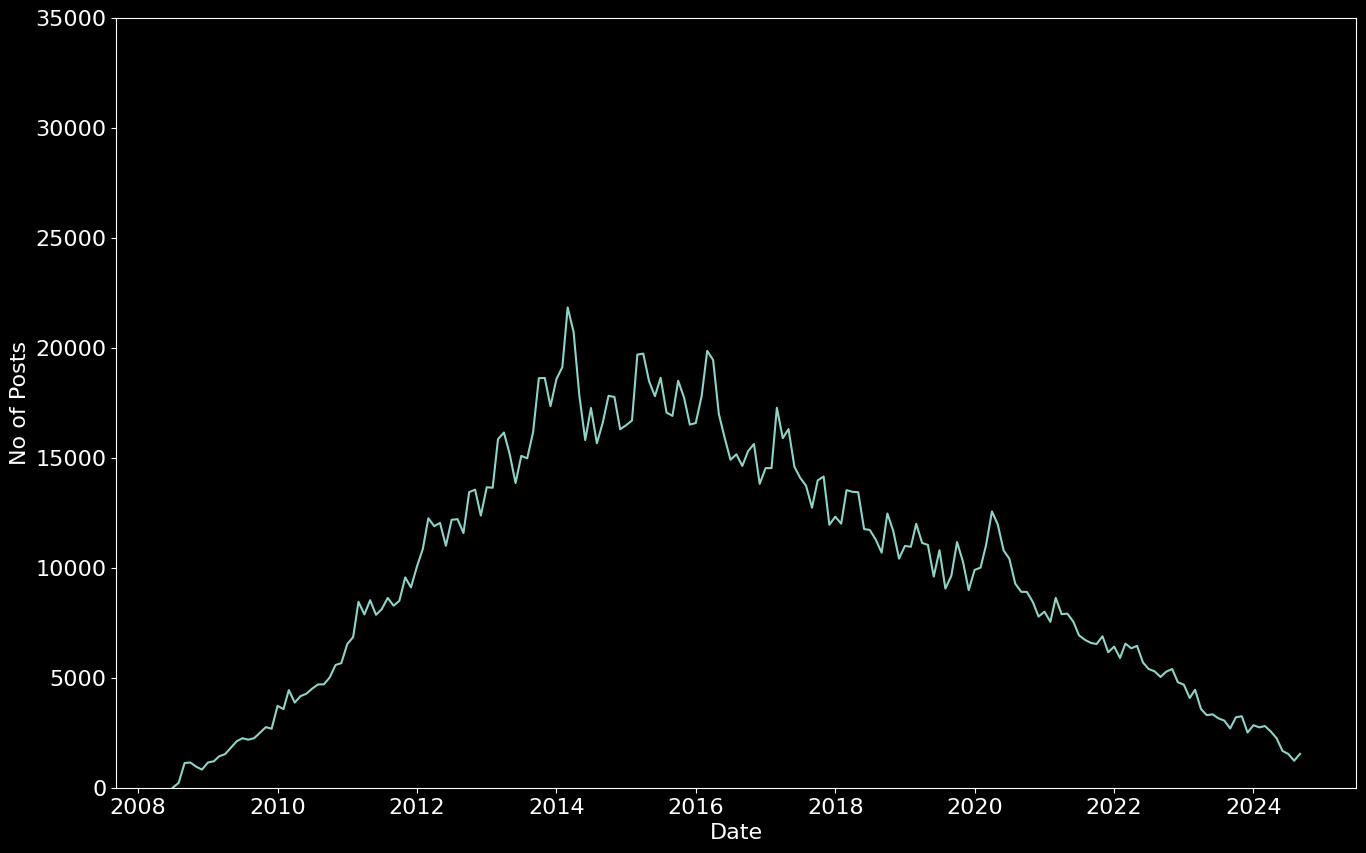

In [22]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(xlabel='Date', fontsize=16)
plt.ylabel('No of Posts', fontsize=16)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

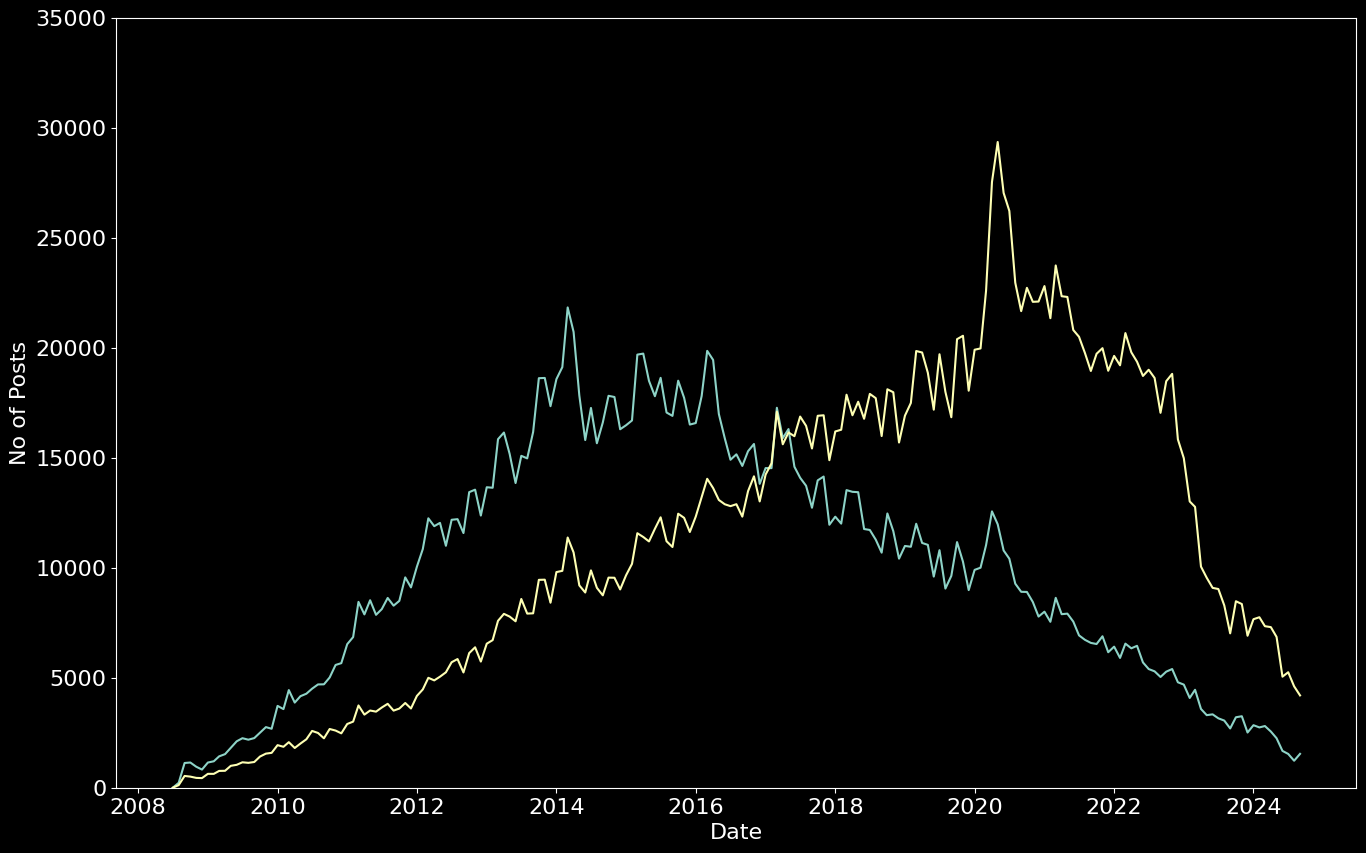

In [23]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(xlabel='Date', fontsize=16)
plt.ylabel('No of Posts', fontsize=16)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])

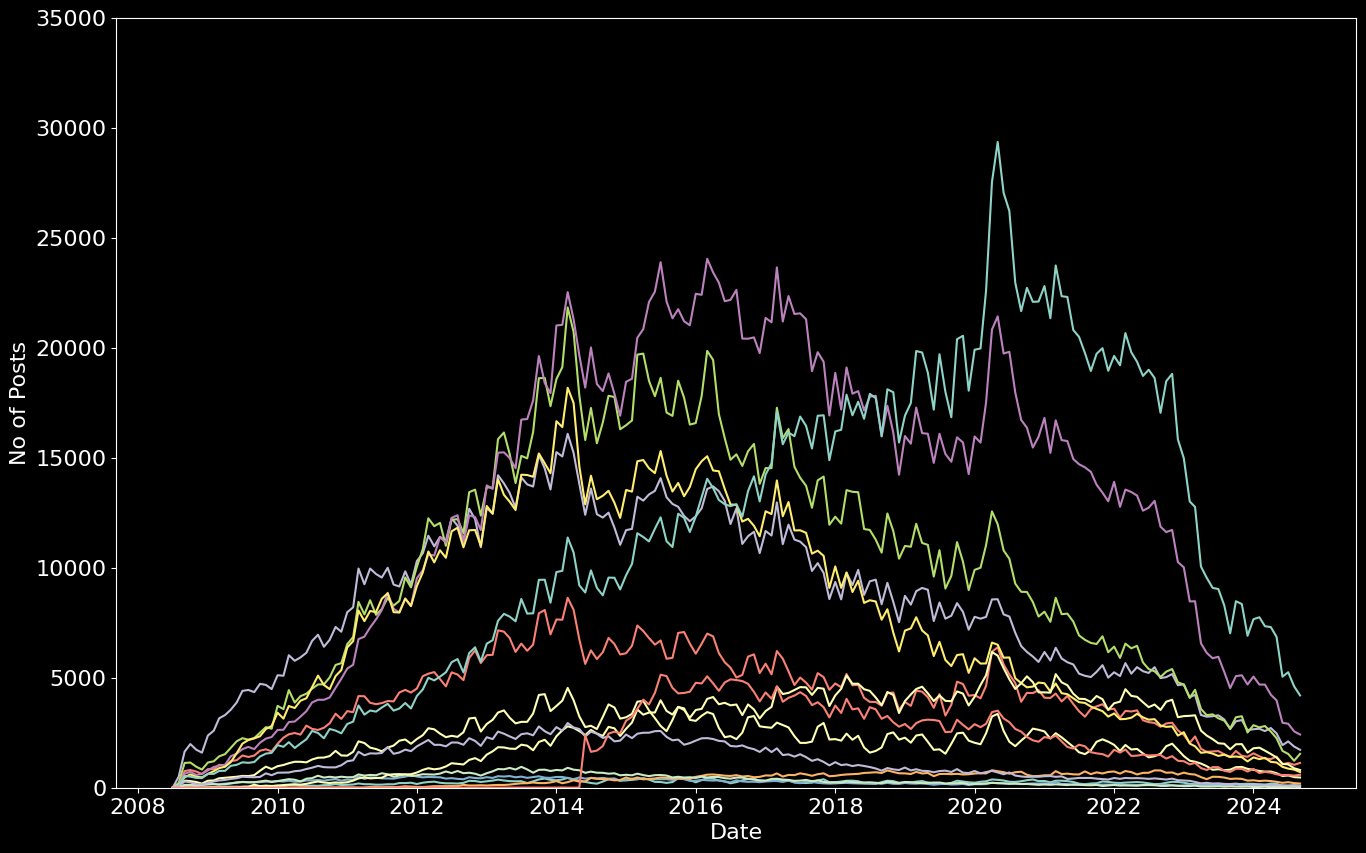

In [24]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(xlabel='Date', fontsize=16)
plt.ylabel('No of Posts', fontsize=16)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

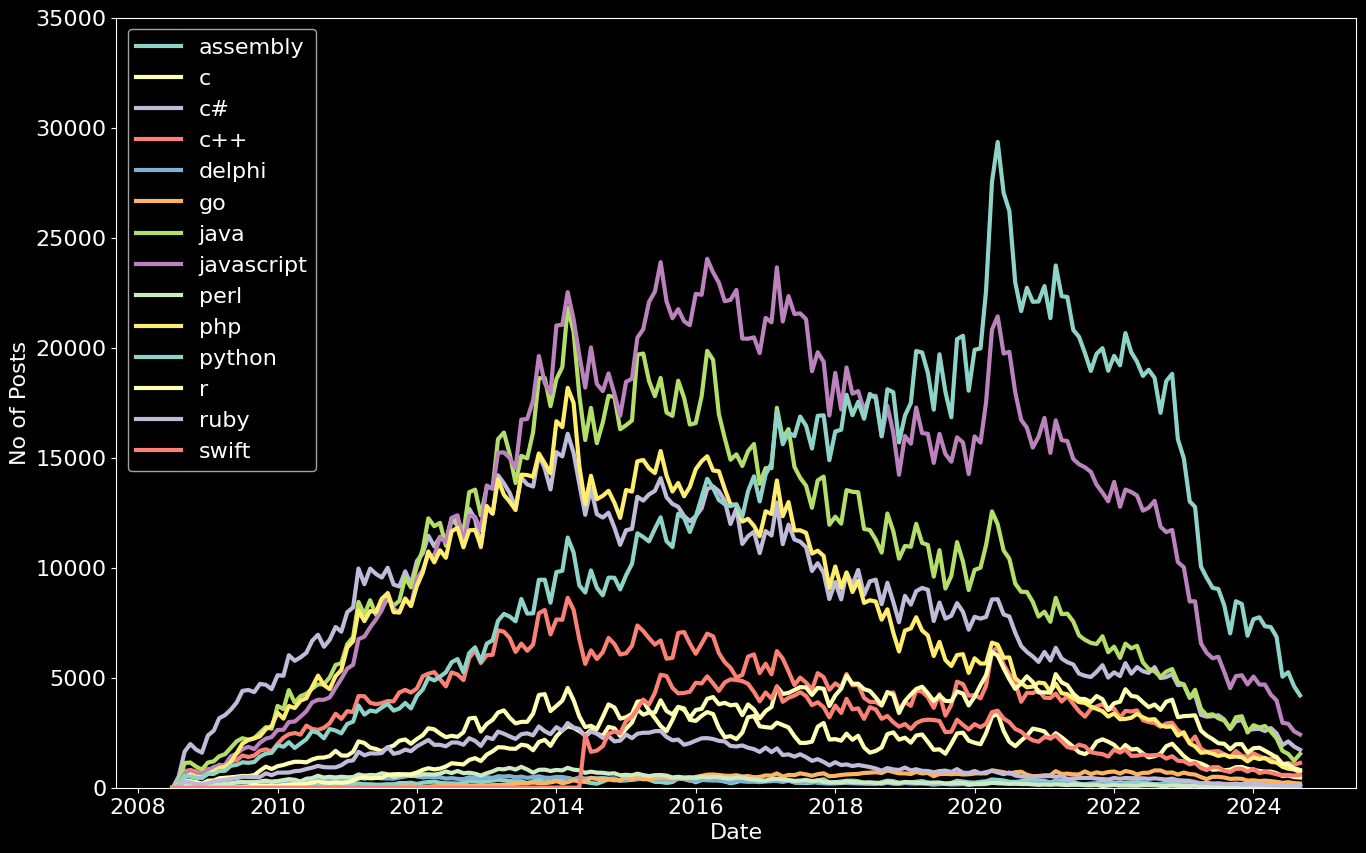

In [25]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(xlabel='Date', fontsize=16)
plt.ylabel('No of Posts', fontsize=16)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
            linewidth = 3, label = reshaped_df[column].name)
    
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

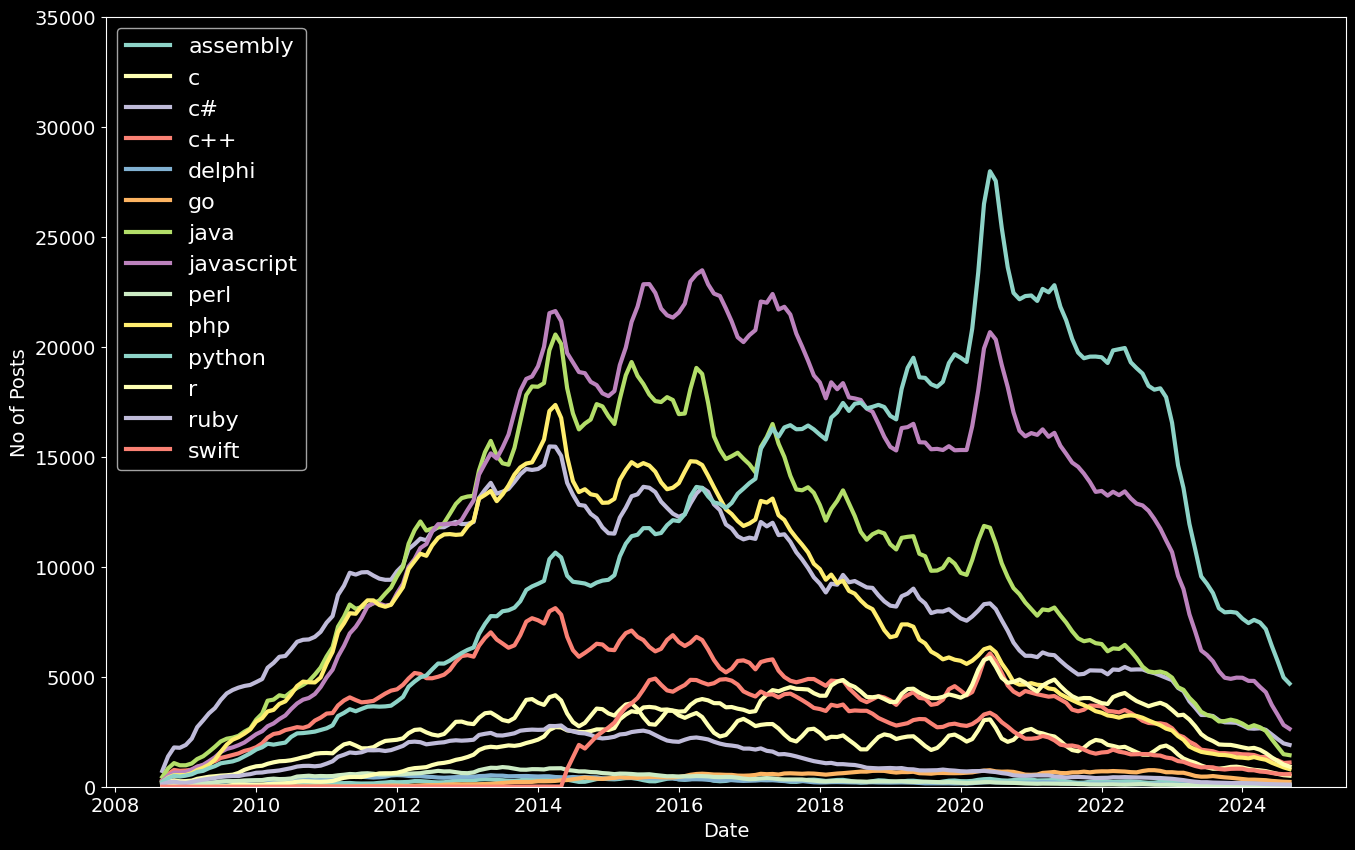

In [26]:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('No of Posts', fontsize=14)
plt.ylim(0,35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
            linewidth=3, label = roll_df[column].name)
    
plt.legend(fontsize=16)

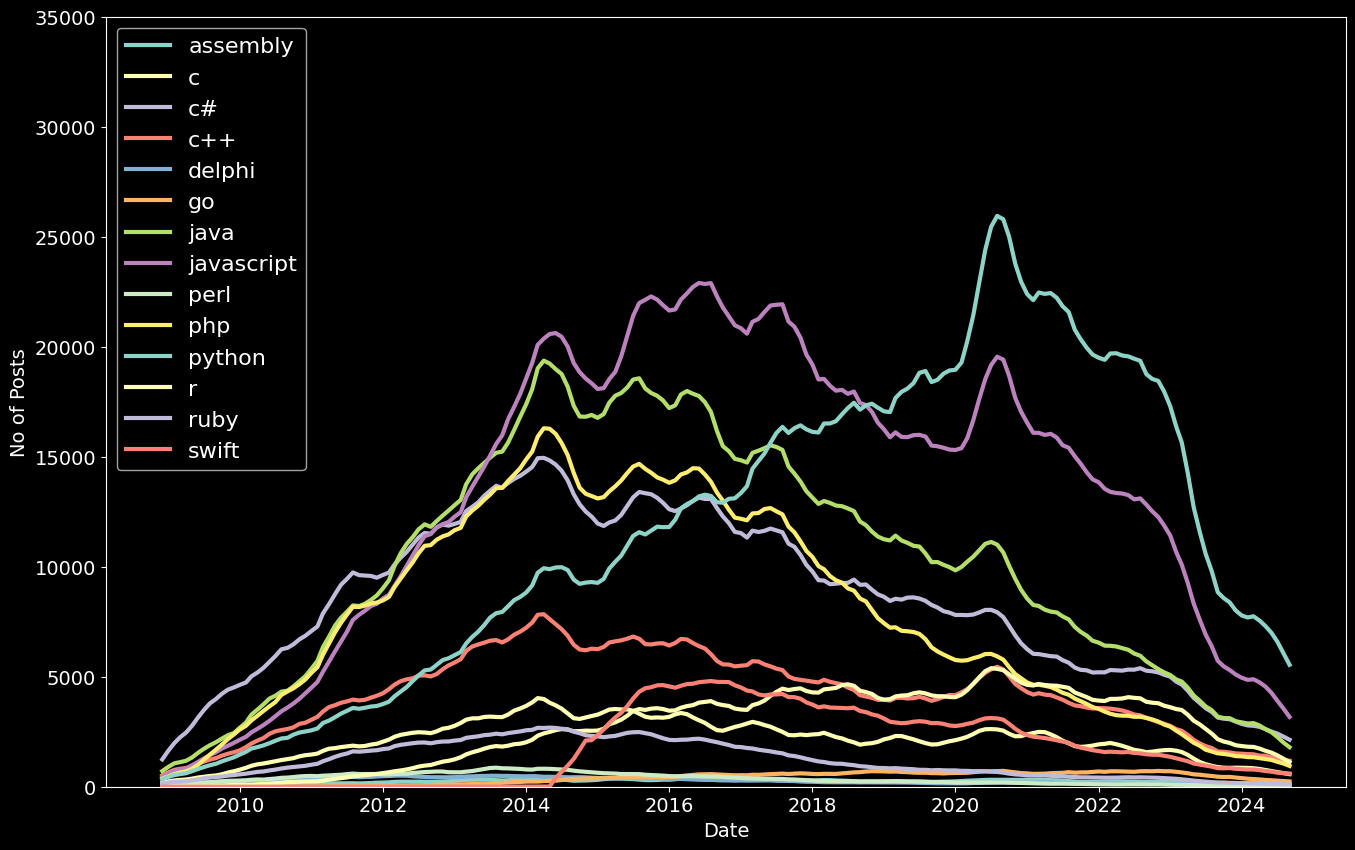

In [27]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('No of Posts', fontsize=14)
plt.ylim(0,35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
            linewidth=3, label = roll_df[column].name)
    
plt.legend(fontsize=16)

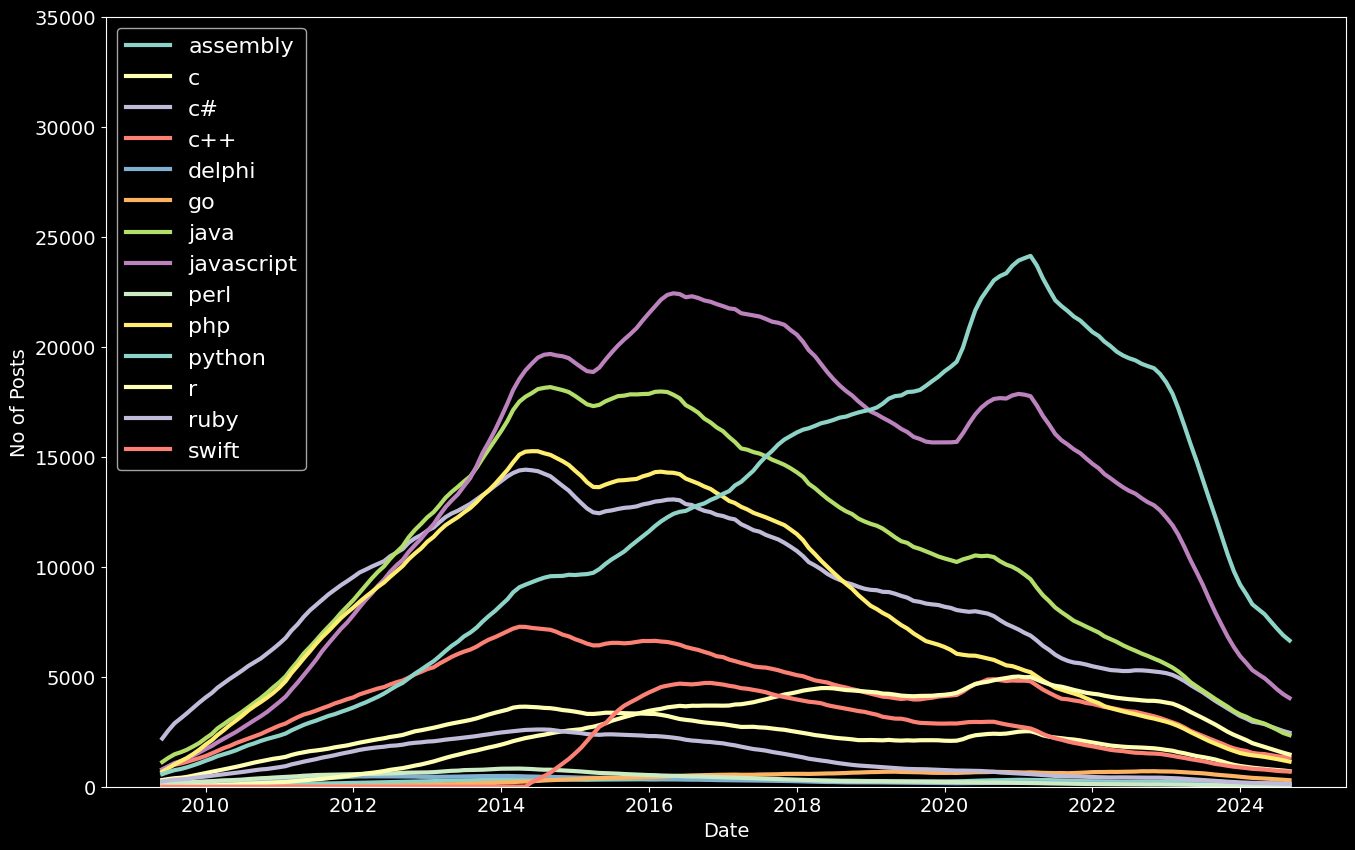

In [28]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('No of Posts', fontsize=14)
plt.ylim(0,35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
            linewidth=3, label = roll_df[column].name)
    
plt.legend(fontsize=16)